In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import plotly as px
import seaborn as sns
from datetime import datetime


In [3]:
df_gas = pd.read_csv('2004-2021.tsv', sep='\t', parse_dates=True)
df_gas.info()
#teste

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120823 entries, 0 to 120822
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   DATA INICIAL                   120823 non-null  object 
 1   DATA FINAL                     120823 non-null  object 
 2   REGIÃO                         120823 non-null  object 
 3   ESTADO                         120823 non-null  object 
 4   PRODUTO                        120823 non-null  object 
 5   NÚMERO DE POSTOS PESQUISADOS   120823 non-null  int64  
 6   UNIDADE DE MEDIDA              120823 non-null  object 
 7   PREÇO MÉDIO REVENDA            120823 non-null  float64
 8   DESVIO PADRÃO REVENDA          120823 non-null  float64
 9   PREÇO MÍNIMO REVENDA           120823 non-null  float64
 10  PREÇO MÁXIMO REVENDA           120823 non-null  float64
 11  MARGEM MÉDIA REVENDA           120823 non-null  object 
 12  COEF DE VARIAÇÃO REVENDA      

In [4]:
df_gas = pd.read_csv('2004-2021.tsv', sep='\t', parse_dates=['DATA INICIAL', 'DATA FINAL'])
df_gas['ANO'] = df_gas['DATA FINAL'].dt.year
df_gas['MÊS'] = df_gas['DATA FINAL'].dt.month
df_gas.head()

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,ANO,MÊS
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133,2004,5
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115,2004,5
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098,2004,5
3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.09,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143,2004,5
4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082,2004,5


In [41]:
df_gas.head()

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098
3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.09,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143
4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082


- Plotar gráfico com a taxa de aumento de cada combustivel em todo período.
- Plotar um gráfico com o crescimento da média do PREÇO MÉDIO REVENDA ano a ano por Região.
- Ver qual o estado que mais/menos aumentou o valor médio do PREÇO MÉDIO REVENDA ano a ano por Região e plotar um gráfico comparando os dois.
- Comparar a média do PREÇO MÉDIO REVENDA com o PREÇO MÉDIO DISTRIBUIÇÃO desses dois estados.
- Plotar um gráfico com a média da quantidade de postos por estado em 2004 x a quantidade média de postos por estado em 2021.
- Ver a correlação da quantidade de postos disponiveis avaliados com PREÇO MÉDIO REVENDA entre todos os estados.
- Mapa de calor com valor médio de cada estado.
- Mapa de calor com quantidade de postos por estado.

In [5]:
# Adcionando a coluna para mês e ano

# df_gas['DATA INICIAL'] = pd.to_datetime(df_gas['DATA INICIAL'], format='%Y-%m-%d')
# df_gas['DATA FINAL'] = pd.to_datetime(df_gas['DATA INICIAL'], format='%Y-%m-%d')
# df_gas['ANO'] = pd.DatetimeIndex(df_gas['DATA INICIAL']).year
# df_gas['MÊS'] = pd.DatetimeIndex(df_gas['DATA INICIAL']).month


<AxesSubplot:title={'center':'CRESCIMENTO ANUAL DO PREÇO MÉDIO POR REGIÃO'}, xlabel='ANO', ylabel='Média do valor em Reais'>

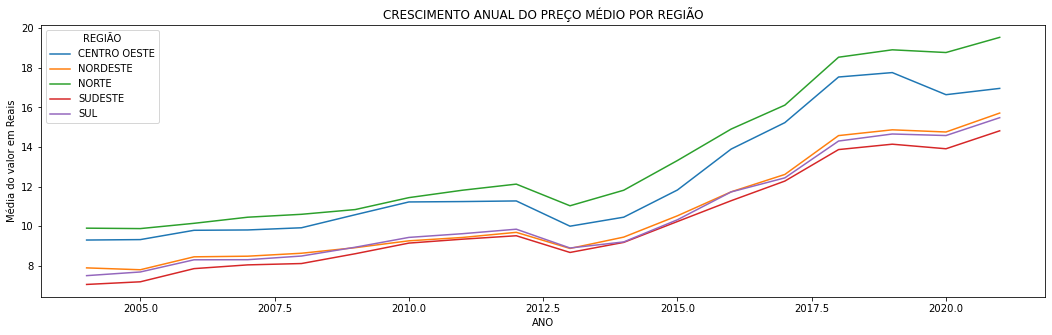

In [6]:
#Gráfico com média de aumento do preço geral dos combustiveis anos a ano por região
from cProfile import label


aumento_anual_região = df_gas.pivot_table(index='ANO', columns='REGIÃO', values='PREÇO MÉDIO REVENDA', aggfunc='mean')
aumento_anual_região.plot(kind='line', figsize=(18,5), title='CRESCIMENTO ANUAL DO PREÇO MÉDIO POR REGIÃO', ylabel='Média do valor em Reais')

In [7]:
df_gas['PRODUTO'] = df_gas['PRODUTO'].apply(lambda x: 'ÓLEO DIESEL' if (x =='OLEO DIESEL') else x)
df_gas['PRODUTO'] = df_gas['PRODUTO'].apply(lambda x: 'ÓLEO DIESEL S10' if (x =='OLEO DIESEL S10') else x)

df_gas.pivot_table(index='PRODUTO', columns='ANO', values='PREÇO MÉDIO REVENDA', aggfunc='mean')



ANO,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
PRODUTO,,,,,,,,,,,,,,,,,,
ETANOL HIDRATADO,1.521847,1.701161,1.970608,1.752209,1.771463,1.769987,1.934743,2.199022,2.225761,2.311252,2.442059,2.609943,3.121997,3.175633,3.423920,3.455001,3.459230,4.094017
GASOLINA ADITIVADA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.616985,5.286273
GASOLINA COMUM,2.234284,2.436047,2.655266,2.602868,2.604606,2.611861,2.660793,2.779880,2.783076,2.912129,3.032910,3.409560,3.747852,3.807801,4.441294,4.408104,4.299587,5.150115
GLP,32.274633,31.768201,33.708021,34.457439,34.677647,36.527942,38.689825,39.208050,40.111488,42.331454,44.898380,50.430093,56.634415,61.709111,71.363585,72.219180,74.132827,84.604591
GNV,1.145797,1.231854,1.376464,1.472851,1.656589,1.723747,1.704758,1.713211,1.793717,1.879127,1.977844,2.165596,2.375365,2.463587,2.832729,3.277410,3.197633,3.317741
ÓLEO DIESEL,1.558047,1.784975,1.930661,1.918883,2.075832,2.113125,2.062843,2.083840,2.134796,2.363232,2.561650,2.887710,3.112608,3.198429,3.588898,3.703722,3.521232,4.126585
ÓLEO DIESEL S10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.490137,2.705282,3.035975,3.252379,3.329472,3.686585,3.786471,3.591912,4.184331


In [8]:
#correlação

# sns.heatmap(df_gas, xticklabels=df_gas['PREÇO MÉDIO REVENDA'], yticklabels=df_gas['REGIÃO'], annot=True).set_title("Correlações", fontsize=20)

In [ ]:
# global_total_sales = df_vgsales.groupby(['Year']).sum().plot(y='Global_Sales', kind='line', figsize=(18,5), color='red')
# na_total_sales = df_vgsales.groupby(['Year']).sum().plot(y='NA_Sales', kind='line', figsize=(18,5), color='blue', ax=global_total_sales)
# eu_total_sales = df_vgsales.groupby(['Year']).sum().plot(y='EU_Sales', kind='line', figsize=(18,5), color='orange', ax=global_total_sales)
# jp_total_sales = df_vgsales.groupby(['Year']).sum().plot(y='JP_Sales', kind='line', figsize=(18,5), color='green', ax=global_total_sales)

# global_total_sales.set_ylabel('Venda em milhões ($)')
# global_total_sales.set_title('Vendas totais por região')


TEste do douglas